In [1]:
import sys
sys.path.append("../../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 5
BATCH_SIZE = 128
LEARNING_RATE = 2e-5
NAME = 'xlm(roberta)-english'
MODEL_NAME = 'xlm-roberta-base'
dir = '../../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'
class_names = ['Disability', 'Gender/Sexual', 'Origin/Nationality', 'Race/Ethnicity', 'Religion']

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_df = train_df[train_df['class'] != 0]
val_df = val_df[val_df['class'] != 0]
test_df = test_df[test_df['class'] != 0]

train_texts = train_df['english_text'].values
val_texts = val_df['english_text'].values
test_texts = test_df['english_text'].values

train_labels = train_df[class_names].values
val_labels = val_df[class_names].values
test_labels = test_df[class_names].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

who you know make waves ina low tide?  dbo’d yo bitch now she both of ours , nigga [0 0 0 1 0]
That bitch look perfect https://t.co/L17zFSuqGQ [0 1 0 0 0]
We on all platforms now, so next time you vibing with a bad bitch, a beautiful woman, whatever you prefer. Play that FIHTEEN so she can know you different [0 1 0 0 0]
just got a haircut, anybody could take me from my bitch rn [0 1 0 0 0]
@barnlife5 @realShawNshawN @grantstern If y'all fucking feel that way then do it lol.  Trump has the balls to do what democrats wish they can do.  But liberals and democrats are soft and scared to be cancelled or they don't bow down to the far left!! 😂😂Y'all are dumb as fuck it's hilarious [0 0 0 1 0]


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="urdu")
    , train_labels[i])

who you know make waves ina low tide dbo’d yo bitch now she both of ours nigga [0 0 0 1 0]
that bitch look perfect [0 1 0 0 0]
we on all platforms now so next time you vibing with a bad bitch a beautiful woman whatever you prefer play that fihteen so she can know you different [0 1 0 0 0]
just got a haircut anybody could take me from my bitch rn [0 1 0 0 0]
barnlife5 realshawnshawn grantstern if yall fucking feel that way then do it lol trump has the balls to do what democrats wish they can do but liberals and democrats are soft and scared to be cancelled or they dont bow down to the far left 😂😂yall are dumb as fuck its hilarious [0 0 0 1 0]


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text) for text in train_texts]
val_texts = [hlp.preprocess_text(text) for text in val_texts]
test_texts = [hlp.preprocess_text(text) for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = XLMRobertaTokenizer.from_pretrained(MODEL_NAME)
model = XLMRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model_multi(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 0/50
----------


Training Progress: 100%|██████████| 241/241 [01:32<00:00,  2.61it/s, loss=0.0276]


Train loss 0.15231404367726126 accuracy 0.798667100130039
Validation loss 0.05710288965039783 accuracy 0.9328067095767505
Model and tokenizer saved at epoch 0
Checkpoint saved: Improved validation accuracy at epoch 0: 0.9328067095767505
Epoch 1/50
----------


Training Progress: 100%|██████████| 241/241 [01:30<00:00,  2.66it/s, loss=0.0166]


Train loss 0.052511072945607154 accuracy 0.937483745123537
Validation loss 0.04773692337704109 accuracy 0.941193680514921
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.941193680514921
Epoch 2/50
----------


Training Progress: 100%|██████████| 241/241 [01:33<00:00,  2.58it/s, loss=0.0155]


Train loss 0.0420528892930056 accuracy 0.9463263979193758
Validation loss 0.04173347498232752 accuracy 0.9557245952798907
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.9557245952798907
Epoch 3/50
----------


Training Progress: 100%|██████████| 241/241 [01:33<00:00,  2.58it/s, loss=0.0134] 


Train loss 0.03322556776987752 accuracy 0.9591352405721717
Validation loss 0.04195824205116541 accuracy 0.956309732787205
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.956309732787205
Epoch 4/50
----------


Training Progress: 100%|██████████| 241/241 [01:33<00:00,  2.58it/s, loss=0.00612]


Train loss 0.02791747894076267 accuracy 0.9661573472041612
Validation loss 0.04309903847536555 accuracy 0.959918080748976
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.959918080748976
Epoch 5/50
----------


Training Progress: 100%|██████████| 241/241 [01:32<00:00,  2.62it/s, loss=0.00574]


Train loss 0.024190115403283495 accuracy 0.9735695708712614
Validation loss 0.04218628355531873 accuracy 0.9603081724205188
Model and tokenizer saved at epoch 5
Checkpoint saved: Improved validation accuracy at epoch 5: 0.9603081724205188
Epoch 6/50
----------


Training Progress: 100%|██████████| 241/241 [01:32<00:00,  2.60it/s, loss=0.00363]


Train loss 0.020076592456688525 accuracy 0.9795838751625487
Validation loss 0.04522093625474767 accuracy 0.9620635849424615
Model and tokenizer saved at epoch 6
Checkpoint saved: Improved validation accuracy at epoch 6: 0.9620635849424615
Epoch 7/50
----------


Training Progress: 100%|██████████| 241/241 [01:31<00:00,  2.64it/s, loss=0.037]  


Train loss 0.01866515874340976 accuracy 0.9806892067620286
Validation loss 0.04476110237495353 accuracy 0.9626487224497757
Model and tokenizer saved at epoch 7
Checkpoint saved: Improved validation accuracy at epoch 7: 0.9626487224497757
Epoch 8/50
----------


Training Progress: 100%|██████████| 241/241 [01:34<00:00,  2.55it/s, loss=0.00749]


Train loss 0.016276293619694304 accuracy 0.9838101430429129
Validation loss 0.04994864044509782 accuracy 0.9607957870099474
No improvement in validation accuracy for 1 epochs.
Epoch 9/50
----------


Training Progress: 100%|██████████| 241/241 [01:31<00:00,  2.62it/s, loss=0.0111] 


Train loss 0.014433685290198232 accuracy 0.9851755526657997
Validation loss 0.056151900148697566 accuracy 0.9575775307197192
No improvement in validation accuracy for 2 epochs.
Epoch 10/50
----------


Training Progress: 100%|██████████| 241/241 [01:33<00:00,  2.57it/s, loss=0.00151]


Train loss 0.011926724266790286 accuracy 0.988036410923277
Validation loss 0.053485134212633616 accuracy 0.9612834015993759
No improvement in validation accuracy for 3 epochs.
Epoch 11/50
----------


Training Progress: 100%|██████████| 241/241 [01:31<00:00,  2.63it/s, loss=0.00126]


Train loss 0.011502236836489398 accuracy 0.9885240572171652
Validation loss 0.052830771531587765 accuracy 0.9629412912034329
Model and tokenizer saved at epoch 11
Checkpoint saved: Improved validation accuracy at epoch 11: 0.9629412912034329
Epoch 12/50
----------


Training Progress: 100%|██████████| 241/241 [01:32<00:00,  2.60it/s, loss=0.000993]


Train loss 0.010291440774448973 accuracy 0.9897919375812744
Validation loss 0.053949643720522016 accuracy 0.9636239516286327
Model and tokenizer saved at epoch 12
Checkpoint saved: Improved validation accuracy at epoch 12: 0.9636239516286327
Epoch 13/50
----------


Training Progress: 100%|██████████| 241/241 [01:33<00:00,  2.58it/s, loss=0.000829]


Train loss 0.008303399076994462 accuracy 0.9920676202860859
Validation loss 0.055344268190243316 accuracy 0.9613809245172615
No improvement in validation accuracy for 1 epochs.
Epoch 14/50
----------


Training Progress: 100%|██████████| 241/241 [01:31<00:00,  2.63it/s, loss=0.00092] 


Train loss 0.008932220418908522 accuracy 0.9911248374512354
Validation loss 0.05823444956079999 accuracy 0.9589428515701189
No improvement in validation accuracy for 2 epochs.
Epoch 15/50
----------


Training Progress: 100%|██████████| 241/241 [01:31<00:00,  2.64it/s, loss=0.00212] 


Train loss 0.007409514517318534 accuracy 0.9923602080624188
Validation loss 0.06016256453693603 accuracy 0.96255119953189
No improvement in validation accuracy for 3 epochs.
Epoch 16/50
----------


Training Progress: 100%|██████████| 241/241 [01:33<00:00,  2.58it/s, loss=0.000646]


Train loss 0.006545955182876268 accuracy 0.9935305591677503
Validation loss 0.06359199094111789 accuracy 0.9623561536961186
No improvement in validation accuracy for 4 epochs.
Epoch 17/50
----------


Training Progress: 100%|██████████| 241/241 [01:33<00:00,  2.58it/s, loss=0.000629]


Train loss 0.007682527348068755 accuracy 0.9918075422626788
Validation loss 0.05839936755221038 accuracy 0.9624536766140043
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


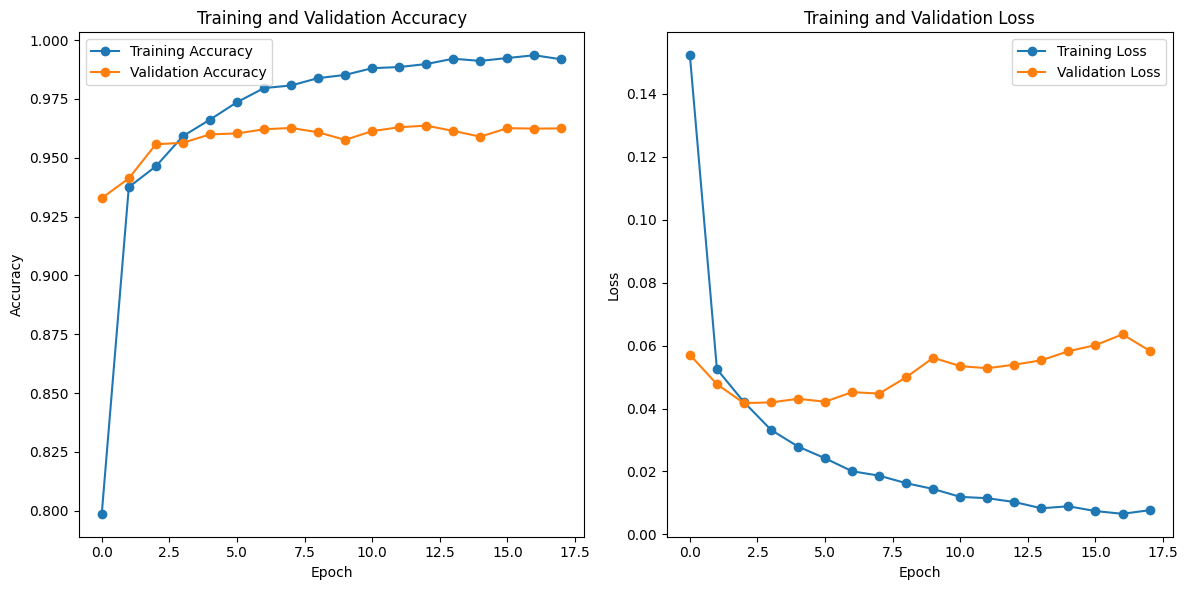

In [9]:
hlp.plot_history(history)

In [10]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model_multi(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc:.2f} Test Loss: {test_loss}')

Test Accuracy: 0.97 Test Loss: 0.05239333599995546


Accuracy: 0.97
F1 Score: 0.97
Precision: 0.97
Recall: 0.97

Classification Report:
                    precision    recall  f1-score   support

        Disability       0.77      0.45      0.57       118
     Gender/Sexual       0.96      0.98      0.97      3388
Origin/Nationality       0.68      0.81      0.74       113
    Race/Ethnicity       0.98      0.96      0.97      3516
          Religion       0.97      0.99      0.98      3119

          accuracy                           0.97     10254
         macro avg       0.87      0.84      0.85     10254
      weighted avg       0.97      0.97      0.97     10254



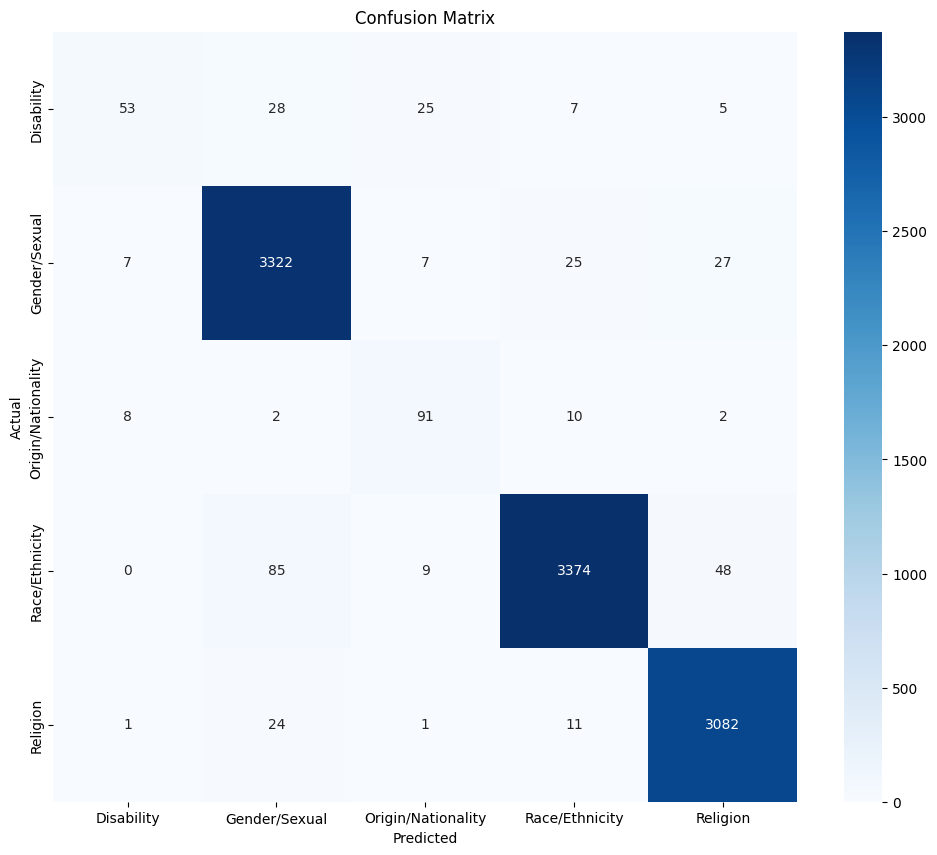

In [11]:
hlp.plot_confusion_matrix(np.argmax(test_label_actual, axis=1), np.argmax(test_label_pred, axis=1), class_names)

In [12]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Origin/Nationality with confidence: 1.00


In [13]:
test_texts = ["Muslims are pathetic they are not humans fuck"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Religion with confidence: 1.00
